In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:

Datos = pd.read_csv('Titanic-Dataset.csv')

In [3]:

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:

Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

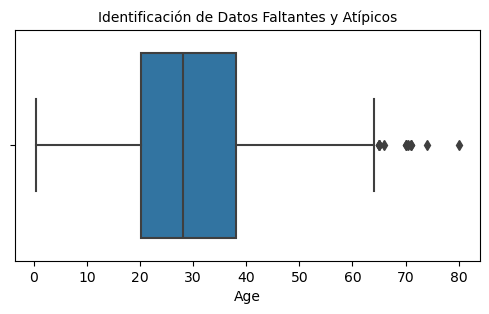

In [5]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

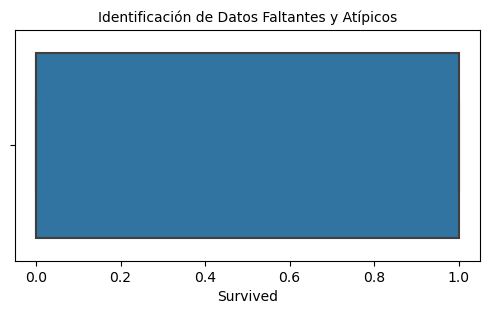

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

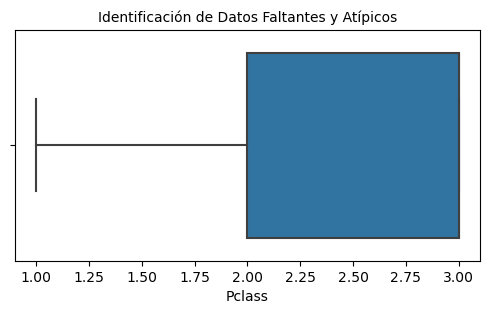

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [8]:
print("Cantidad de Registros con cero en años: ",Datos['Age'].isin([0]).sum())

Cantidad de Registros con cero en años:  0


In [9]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [10]:
Datos['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [11]:
Datos[['Age']].head(40)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [12]:
Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:

Datos[['Survived']].head(40)


,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [14]:
Datos = Datos[['Survived', 'Pclass', 'SibSp', 'Parch']]
 
X = Datos.drop('Survived',axis=1)
Y = Datos['Survived']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [15]:

print (X_train)

     Pclass  SibSp  Parch
105       3      0      0
68        3      4      2
253       3      1      0
320       3      0      0
706       2      0      0
..      ...    ...    ...
835       1      1      1
192       3      1      0
629       3      0      0
559       3      1      0
684       2      1      1

[668 rows x 3 columns]


In [16]:
print (Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int64


In [17]:
modelo_regresion = LinearRegression() 
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test)

In [18]:
print (Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64


In [19]:
print (Prediccion)

[0.24445573 0.24445573 0.19973558 0.59038909 0.38178651 0.61873547
 0.61873547 0.75606625 0.59038909 0.24445573 0.21610934 0.4315956
 0.24445573 0.56892638 0.61873547 0.24445573 0.24445573 0.4719146
 0.24445573 0.31312112 0.4315956  0.61873547 0.24445573 0.61873547
 0.24445573 0.65905448 0.24445573 0.24445573 0.50026099 0.29674735
 0.24445573 0.4315956  0.24445573 0.61873547 0.21610934 0.61873547
 0.24445573 0.4315956  0.4315956  0.4315956  0.65905448 0.24445573
 0.24445573 0.19973558 0.59038909 0.24445573 0.24445573 0.69937348
 0.4315956  0.65905448 0.61873547 0.68740086 0.4719146  0.24445573
 0.61873547 0.37490283 0.61873547 0.26840097 0.29674735 0.18776296
 0.24445573 0.51911729 0.59038909 0.61873547 0.38178651 0.24445573
 0.61873547 0.50026099 0.4719146  0.61873547 0.40324922 0.59038909
 0.59038909 0.24445573 0.24445573 0.34655644 0.67102709 0.61873547
 0.24445573 0.4315956  0.21610934 0.28477473 0.4719146  0.24445573
 0.4315956  0.61873547 0.61873547 0.24445573 0.4315956  0.590389

In [20]:
from sklearn import metrics
print('El error absoluto medio del modelo es:', metrics.mean_absolute_error(Y_test, Prediccion))
print('El Error Cuadrático Medio del modelo es:', metrics.mean_squared_error(Y_test, Prediccion))
print('El error cuadratico medio del modelo es:', np.sqrt(metrics.mean_squared_error(Y_test, Prediccion)))

El error absoluto medio del modelo es: 0.4107214995732016
El Error Cuadrático Medio del modelo es: 0.20103201506560384
El error cuadratico medio del modelo es: 0.44836593878840064


Text(0, 0.5, 'Prediccion')

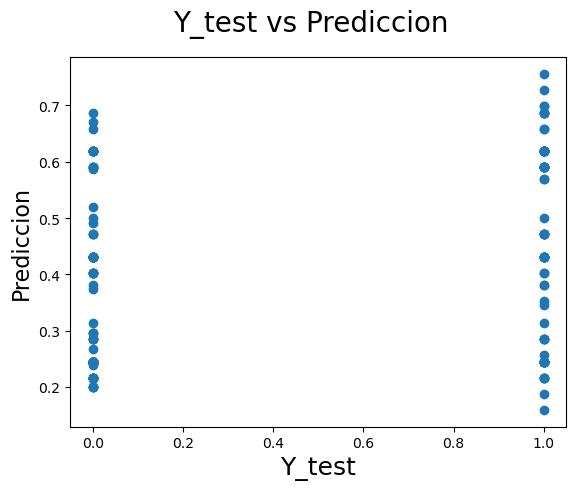

In [21]:
fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('Y_test vs Prediccion', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Prediccion', fontsize=16)      